# 구글 드라이브 연동

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 한글처리

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 스프린트 미션 소개
이번 미션에서는 Hotel Booking Demand Datasets를 분석해볼 예정입니다.

해당 데이터는 2015.07.01부터 2017.08.31까지의 Resort Hotel과 City Hotel의 예약 데이터를 포함하고 있습니다.

예약 취소는 호텔의 매출에 영향을 끼치는 요소 중 하나인데요, 지금부터 여러분이 City Hotel과 Resort Hotel의 관리인이라고 상상해 보세요. 호텔 관리인으로서 예약 취소와 관련이 있는 요소들을 파악해보고, 예약 취소율을 줄이기 위한 아이디어도 생각해 볼 겁니다.
1. 어떤 조건에서 예약 취소가 빈번하게 발생하는지,
2. 예약 취소와 관련이 있는 요소들이 무엇인지 파악해보고,
3. 마지막으로 어떻게 하면 예약 취소율을 개선할 수 있을지 아이디어도 얻어 보세요!

데이터 관련 추가 설명
해당 데이터는 캐글의 Hotel Booking Demand Datasets(링크)를 가져와서 코드잇에서 일부 수정을 가한 데이터입니다. 따라서 캐글에서 제공하는 데이터와 100% 동일하지는 않습니다.

다른 사람들은 이 데이터를 어떻게 분석하였는지 궁금하다면, 캐글에서 다른 사용자 분들이 분석한 내용들을 참고하는 것 또한 추천드립니다.

추가적으로 캐글에 올라와 있는 데이터 또한 Hotel Booking Demand Datasets라는 아티클에서 가져온 데이터입니다.(아티클 링크)

해당 아티클은 영문으로 제공되는데요, 데이터가 어떤 방식으로 얻어졌고, 데이터 각 컬럼의 분포 및 경향성에 대해 추가적인 정보를 얻고자 하시는 분들은 해당 아티클을 참고해보는 것 또한 추천드립니다.

Kaggle에 올라와 있는 Notebook 참고하는 법
Kaggle에서 다른 사용자 분들이 해당 데이터에 대해 분석한 Notebook은 Code 페이지(링크)에서 확인할 수 있고, Most Votes를 얻은 Dataset Notebooks를 참고하면 여러 명의 캐글 사용자들이 괜찮다고 생각하는 분석 노트북들이 무엇인지 알 수 있습니다.

다만 해당 내용을 무조건적으로 따라하거나 코드를 사용하는 것보다는, 다른 사람들은 이 데이터를 이런 식으로 접근하였구나, 정도로 참고만 하는 것을 추천드립니다! 예약 취소율을 개선하기 위한 본인만의 분석을 진행해 보아요 🙂

데이터 설명

해당 데이터는 2015.07.01부터 2017.08.31까지의 Resort Hotel과 City Hotel의 예약 데이터를 포함하고 있습니다.

데이터 셋 다운로드

| **컬럼명** | **설명** |
| --- | --- |
| **hotel** | **호텔명 (Resort Hotel 혹은 City Hotel)** |
| **is_canceled** | **호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값** |
| **lead_time** | **호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 날짜)** |
| **arrival_date_year** | **고객의 호텔 도착 연도** |
| **arrival_date_month** | **고객의 호텔 도착 월** |
| **arrival_date_week_number** | **고객의 호텔 도착 주** |
|  | **(예시: 2015년도 셋째 주에 도착 → arrival_date_week_number = 3)** |
| **arrival_date_day_of_month** | **고객의 호텔 도착 일** |
|  | **(예시: 3월 2일에 도착 → arrival_date_day_of_month = 2)** |
| **stays_in_weekend_nights** | **고객이 호텔에 숙박했거나 예약한 주말 밤 수(토요일~일요일)** |
|  | **(예시: 평일 3일 주말 2일 예약한 경우 → stays_in_weekend_nights = 2)** |
| **stays_in_week_nights** | **고객이 호텔에 숙박했거나 예약한 주중 밤 수(월요일~금요일)** |
|  | **(예시: 평일 3일 주말 2일 예약한 경우 → stays_in_week_nights = 3)** |
| **adults** | **예약된 어른의 수** |
| **children** | **예약된 어린이의 수** |
| **babies** | **예약된 아기의 수** |
| **meal** | **예약된 식사 유형** |
|  | **- Undefined/SC: 식사 포함되지 않은 옵션** |
|  | **- BB: Bed & Breakfast 옵션** |
|  | **- HB: Half board (아침 식사 및 추가 식사 1회 - 일반적으로 저녁 식사) 옵션** |
|  | **- FB: Full board (아침, 점심, 저녁)** |
| **country** | **투숙객의 출신 국가. 카테고리는 ISO 3155-3:2013 형식으로 표시** |
|  | **(국가 표기 코드는 [링크](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes) 참조)** |
| **market_segment** | **시장 세그먼트. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미.** |
| **distribution_channel** | **예약 유통 채널. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미.** |
| **is_repeated_guest** | **이전에 방문을 하였던 손님인지(1) 아닌지(0)를 나타나는 값** |
| **previous_cancellations** | **현재 예약 이전에 고객이 취소한 이전 예약 수** |
| **previous_bookings_not_canceled** | **현재 예약 이전에 고객이 취소하지 않은 이전 예약 수** |
| **reserved_room_type** | **예약한 룸 타입 코드** |
| **assigned_room_type** | **배정된 룸 타입 코드. 호텔 운영상의 이유(ex. 초과 예약 등) 또는 고객 요청으로 인해 예약한 객실과 다른 객실 유형이 배정되는 경우가 존재.** |
| **booking_changes** | **예약 시점부터 예약 취소/체크인 시점까지 에약에 대한 변경/수정 횟수** |
| **agent** | **예약을 진행한 여행사의 ID** |
| **company** | **예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID** |
| **days_in_waiting_list** | **예약이 확정되기 전까지 해당 예약이 예약 대기자 명단에 있었던 일수** |
| **required_car_parking_spaces** | **고객이 요구하는 주차 공간 수** |
| **total_of_special_requests** | **고객의 특별 요청 건수 (ex. 트윈 베드, 아기 침대, 고층, 특별한 뷰 등)** |
| **reservation_status** | **예약의 마지막 상태, 총 3가지 카테고리로 구성** |
|  | **- Canceled: 고객이 예약을 취소함** |
|  | **- Check-Out: 고객이 체크인을 하고 체크아웃을 함** |
|  | **- No-Show: 노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음.** |
| **reservations_status_date** | **마지막 예약 상태(reservation_status)가 설정된 날짜.** |

# 데이터 세트 가져오기


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hotel_data_modified.csv")
df = pd.read_csv("https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=11679&version=1&directory=/hotel_data_modified.csv&name=hotel_data_modified.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,NaN,NaN,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,NaN,NaN,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,NaN,NaN,0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,304.0,NaN,0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03


# 1. 데이터 탐색 및 이해 (Exploratory Data Analysis)


In [ ]:
df.shape#행/열 개수 확인

(119390, 29)

In [ ]:
df.info() # 컬럼별 데이터 타입 및 값의 개수 파악
#  10  children                        119386 non-null  float64
#  13  country                         118902 non-null  object
#  22  agent                           103050 non-null  float64
#  23  company                         6797 non-null    float64
#  개수 다름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# 컬럼들 안의 값 뭐가 들어 있는지
for column in ['adults','children','babies','meal','country','market_segment','distribution_channel',
               'agent','company']:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("-" * 30) # 구분자

Unique values in column 'adults':
[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
------------------------------
Unique values in column 'children':
[ 0.  1.  2. 10.  3. nan]
------------------------------
Unique values in column 'babies':
[ 0  1  2 10  9]
------------------------------
Unique values in column 'meal':
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------
Unique values in column 'country':
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'C

In [ ]:
# 각 컬럼들 빈 값 몇개인지? 결측치
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# 중복된 데이터
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,A,1,250.0,NaN,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,E,0,250.0,NaN,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,D,0,240.0,NaN,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,A,0,240.0,NaN,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03


# 중복 제거 df_ddup


In [ ]:
# 중복 행 개수
duplicate_rows = df.duplicated().sum()

print(f"중복 행 : {duplicate_rows}")
df[df.duplicated()]

중복 행 : 33103


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,240.0,NaN,0,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,A,1,250.0,NaN,0,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,E,0,250.0,NaN,0,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,D,0,240.0,NaN,0,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,A,0,240.0,NaN,0,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,D,0,9.0,NaN,0,0,2,Check-Out,2017-09-03


In [ ]:
# 중복행 확인
duplicate_rows_df = df[df.duplicated(subset=None,keep=False)].sort_values(by=list(df.columns))
print(len(duplicate_rows_df))
display(duplicate_rows_df)

41815


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40772,City Hotel,0,0,2015,August,32,7,0,2,2,...,A,A,0,14.0,NaN,0,0,1,Check-Out,2015-08-09
40802,City Hotel,0,0,2015,August,32,7,0,2,2,...,A,A,0,14.0,NaN,0,0,1,Check-Out,2015-08-09
40821,City Hotel,0,0,2015,August,32,8,0,1,2,...,A,A,0,9.0,NaN,0,0,1,Check-Out,2015-08-09
40838,City Hotel,0,0,2015,August,32,8,0,1,2,...,A,A,0,9.0,NaN,0,0,1,Check-Out,2015-08-09
76792,City Hotel,0,0,2015,August,33,10,1,0,2,...,A,A,0,NaN,NaN,0,0,0,Check-Out,2015-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,A,A,0,96.0,NaN,0,0,0,Canceled,2017-05-03
11603,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,A,A,0,96.0,NaN,0,0,0,Canceled,2017-05-03
11605,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,A,A,0,96.0,NaN,0,0,0,Canceled,2017-05-03
11606,Resort Hotel,1,471,2017,May,20,20,2,5,2,...,A,A,0,96.0,NaN,0,0,0,Canceled,2017-05-03


In [ ]:
# 중복행 제거
# 첫 행만 남기고 중복 제거
df_ddup = df.drop_duplicates() # keep="first"가 기본

df_ddup.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,86283.000000,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,74299.000000,5172.000000,86287.000000,86287.000000,86287.000000
mean,0.276855,79.200158,2016.211098,26.834158,15.812985,1.003906,2.621623,1.877328,0.139923,0.010952,0.039508,0.030306,0.186169,0.271524,93.715528,182.740526,0.731605,0.084798,0.700534
std,0.447447,85.434696,0.686709,13.678594,8.836442,1.031332,2.052188,0.628117,0.457808,0.114268,0.194801,0.361271,1.742821,0.728996,112.953556,131.009213,9.923395,0.282425,0.832575
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,0.000000,0.000000
75%,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,265.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


In [ ]:
df_ddup.duplicated().sum()

np.int64(0)

# 결측치 확인 및 처리 df_nan

In [ ]:
# 결측치
print("원본:df")
print((len(df)-df.count())[lambda x: x > 0])
print('*'*50)
print("중복제거:df_ddup")
print((len(df_ddup)-df_ddup.count())[lambda x: x > 0])

원본:df
children         4
country        488
agent        16340
company     112593
dtype: int64
**************************************************
중복제거:df_ddup
children        4
country       451
agent       11988
company     81115
dtype: int64


In [ ]:
# 결측치 비율 확인
for column in df.columns:
    if (df[column].isnull().sum()) / (df[column].shape[0]) * 100 > 0:
        print(f"결측치 비율 '{column}':")
        print((df[column].isnull().sum()) / (df[column].shape[0]) * 100 )
        print("-" * 30)
print('*'*70)
for column in df_ddup.columns:
    if (df_ddup[column].isnull().sum()) / (df_ddup[column].shape[0]) * 100 > 0:
        print(f"결측치 비율 '{column}':")
        print((df_ddup[column].isnull().sum()) / (df_ddup[column].shape[0]) * 100 )
        print("-" * 30)

# 변수별 결측률 (%) 계산
# na_rate = (df_ddup.isna().mean()*100).sort_values(ascending=False)
# display(na_rate.head(10))          # 결측률 상위 10개만 봅니다.
# print(df.isna().sum().sum())   # 전체 NaN 개수

결측치 비율 'children':
0.003350364352123293
------------------------------
결측치 비율 'country':
0.40874445095904177
------------------------------
결측치 비율 'agent':
13.686238378423655
------------------------------
결측치 비율 'company':
94.30689337465449
------------------------------
**********************************************************************
결측치 비율 'children':
0.004635692514515512
------------------------------
결측치 비율 'country':
0.522674331011624
------------------------------
결측치 비율 'agent':
13.89317046600299
------------------------------
결측치 비율 'company':
94.00604957873145
------------------------------


In [ ]:
# 결측값 행 확인
print(df_ddup['children'].isnull().sum())
display(df_ddup[df_ddup['children'].isnull()])
print('다른 상황','*'*100)
print('사람',df_ddup[df_ddup['children'].isnull()][['hotel','adults','babies','country',]])
print(df_ddup[df_ddup['children'].isnull()][['agent','company','market_segment','distribution_channel']])
print(df_ddup[df_ddup['children'].isnull()][['is_repeated_guest','booking_changes','days_in_waiting_list']])
print(df_ddup[df_ddup['children'].isnull()][['previous_cancellations','previous_bookings_not_canceled']])
print('예약 일',df_ddup[df_ddup['children'].isnull()][['is_canceled','reservation_status','reservation_status_date']])
print(df_ddup[df_ddup['children'].isnull()][['lead_time','arrival_date_year','arrival_date_month','arrival_date_day_of_month']])
print(df_ddup[df_ddup['children'].isnull()][['stays_in_weekend_nights','stays_in_week_nights']])
print(df_ddup[df_ddup['children'].isnull()][['required_car_parking_spaces','total_of_special_requests']])

print('컬럼 값들 수','*'*100)
# 컬럼의 전체 값 분포(0인 경우 많은지, 이상치 있는지 등)
print(df_ddup['children'].value_counts(dropna=False))
print('평균/중간/최빈','*'*100)
print('평균:',df_ddup['children'].mean())
print('중간값:',df_ddup['children'].median())
print('최빈값:',df_ddup['children'].mode())
print('음수 쳌','*'*100)
print(df_ddup[df_ddup['children'] < 0])

4


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,B,B,0,NaN,NaN,0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,...,B,B,0,14.0,NaN,0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,B,B,0,NaN,NaN,0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,...,B,B,0,9.0,NaN,0,0,1,Canceled,2015-08-09


다른 상황 ****************************************************************************************************
사람             hotel  adults  babies country
40600  City Hotel       2       0     PRT
40667  City Hotel       2       0     PRT
40679  City Hotel       3       0     PRT
41160  City Hotel       2       0     PRT
       agent  company market_segment distribution_channel
40600    NaN      NaN      Undefined            Undefined
40667   14.0      NaN         Direct            Undefined
40679    NaN      NaN      Undefined            Undefined
41160    9.0      NaN      Online TA            Undefined
       is_repeated_guest  booking_changes  days_in_waiting_list
40600                  0                0                     0
40667                  0                0                     0
40679                  0                0                     0
41160                  0                0                     0
       previous_cancellations  previous_bookings_not_canceled
40600   

In [ ]:
df_nan = df_ddup.copy()
# children 결측 0으로 대체
df_nan['children'].fillna(0, inplace=True)

# agent 결측 'No Agent'로 별도 범주 처리
df_nan['agent'] = df_ddup['agent'].fillna('No Agent')

# company 컬럼 결측치 높아서- 제거
df_nan.drop(columns=['company'], inplace=True)

df_nan['country'].fillna(df_ddup['country'].mode()[0], inplace = True)

In [ ]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86287 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86287 non-null  object 
 1   is_canceled                     86287 non-null  int64  
 2   lead_time                       86287 non-null  int64  
 3   arrival_date_year               86287 non-null  int64  
 4   arrival_date_month              86287 non-null  object 
 5   arrival_date_week_number        86287 non-null  int64  
 6   arrival_date_day_of_month       86287 non-null  int64  
 7   stays_in_weekend_nights         86287 non-null  int64  
 8   stays_in_week_nights            86287 non-null  int64  
 9   adults                          86287 non-null  int64  
 10  children                        86287 non-null  float64
 11  babies                          86287 non-null  int64  
 12  meal                            8628

In [ ]:
display(df_nan.describe(include='all'))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,86287,86287.000000,86287.000000,86287.000000,86287,86287.000000,86287.000000,86287.000000,86287.000000,86287.000000,...,86287.000000,86287,86287,86287.000000,86287.0,86287.000000,86287.000000,86287.000000,86287,86287
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,NaN,10,12,NaN,334.0,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,NaN,A,A,NaN,9.0,NaN,NaN,NaN,Check-Out,2016-02-14
freq,52913,NaN,NaN,NaN,11136,NaN,NaN,NaN,NaN,NaN,...,NaN,55722,45596,NaN,28567.0,NaN,NaN,NaN,62398,205
mean,NaN,0.276855,79.200158,2016.211098,NaN,26.834158,15.812985,1.003906,2.621623,1.877328,...,0.186169,NaN,NaN,0.271524,NaN,0.731605,0.084798,0.700534,NaN,NaN
std,NaN,0.447447,85.434696,0.686709,NaN,13.678594,8.836442,1.031332,2.052188,0.628117,...,1.742821,NaN,NaN,0.728996,NaN,9.923395,0.282425,0.832575,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,11.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,49.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,124.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,...,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN


# 데이터 값 확인


In [ ]:
#컬럼별 데이터 확인
# 수치형 컬럼 리스트
num_cols = df_nan.select_dtypes(include=['int64', 'float64']).columns.tolist()
# 범주형 컬럼 리스트
cat_cols = df_nan.select_dtypes(include=['object', 'category']).columns.tolist()
# print("수치형 컬럼:", num_cols)
# 수치형 컬럼: ['is_canceled',
# 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
# 'stays_in_weekend_nights', 'stays_in_week_nights',
# 'adults', 'children', 'babies',
# 'is_repeated_guest',
# 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
# print("범주형 컬럼:", cat_cols)
# 범주형 컬럼: ['hotel',
# 'arrival_date_month', 'meal', 'country',
# 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type',
# 'agent', 'reservation_status', 'reservation_status_date']
for c in df_nan.columns:
    n=df_nan[c].nunique()
    # print(f'{c}',n)
    # print(df_nan[c].nunique(),":",df_nan[c].unique())
    if n<300:print(f'{c}',n,':',df_nan[c].unique())
    else : print(f'{c}',n,':','많아')

hotel 2 : ['Resort Hotel' 'City Hotel']
is_canceled 2 : [0 1]
lead_time 479 : 많아
arrival_date_year 3 : [2015 2016 2017]
arrival_date_month 12 : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
arrival_date_week_number 53 : [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
arrival_date_day_of_month 31 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
stays_in_weekend_nights 17 : [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
stays_in_week_nights 35 : [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 25 17 32 26 18 34 35 41]
adults 14 : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children 5 : [ 0.  1.  2. 10.  3.]
babies 5 : [ 0  1  2 10  9]
meal 5 : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country 177 : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 

In [ ]:
print("--- 원본 데이터 (df) ---")
print("형태:", df.shape)
print("결측치 개수:\n", df.isnull().sum().sum())

print("\n--- 중복 제거 데이터 (df_ddup) ---")
print("형태:", df_ddup.shape)
print("결측치 개수:\n", df_ddup.isnull().sum().sum())

print("\n--- 결측치 처리 데이터 (df_nan) ---")
print("형태:", df_nan.shape)
print("결측치 개수:\n", df_nan.isnull().sum().sum())

--- 원본 데이터 (df) ---
형태: (119390, 29)
결측치 개수:
 129425

--- 중복 제거 데이터 (df_ddup) ---
형태: (86287, 29)
결측치 개수:
 93558

--- 결측치 처리 데이터 (df_nan) ---
형태: (86287, 28)
결측치 개수:
 0


## 이상한 값
| **논리** | **처리 권장** |
| --- | --- |
| **`res_status` = No-Show & `res_status_date` ≠ arrival_date** | 날짜 오류 → ** `데이터 이상해서 삭제`**|
| `children,adults,babies` =0 | 사람 없는 데이터 삭제|

In [ ]:
df_new = df_nan.copy()

df_new["res_status_date"] = pd.to_datetime(df_new["reservation_status_date"])

df_new["children"] = df_new["children"].astype(int)

# 월 문자열 → 숫자
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_new['arr_month_num'] = df_new['arrival_date_month'].map(month_map)

# 도착일 컬럼 생성
df_new['arrival_date'] = pd.to_datetime(dict(
    year=df_new['arrival_date_year'],
    month=df_new['arr_month_num'],
    day=df_new['arrival_date_day_of_month']
))

# 예약일 컬럼 생성
# 'booking_date' 컬럼 생성 (도착일 - lead_time)
df_new['booking_date'] = df_new['arrival_date'] - pd.to_timedelta(df_new['lead_time'], unit='days')

# 총 숙박일 수 및 체크아웃 날짜 생성
# 'stay_nights' 컬럼 생성
df_new['stay_nights'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']
# 'checkout_date' 컬럼 생성 (도착일 + stay_nights)
df_new['checkout_date'] = df_new['arrival_date'] + pd.to_timedelta(df_new['stay_nights'], unit='days')


In [ ]:
# 노쇼
noshow=df_new[(df_new['is_canceled']==1) &(df_new['reservation_status']=='No-Show') &
 (df_new['res_status_date']!= df_new['arrival_date'])]
print('노쇼',noshow.shape[0],':',noshow.shape[0]/(df_new.shape[0])*100)
display(noshow.head(1))
# 이상한 데이터 조건 정의
condition = (df_new['is_canceled'] == 1) & \
            (df_new['reservation_status'] == 'No-Show') & \
            (df_new['res_status_date'] != df_new['arrival_date'])

# 조건을 만족하지 않는 행만 선택 (~는 NOT 연산자)
df_new_cleaned = df_new.loc[~condition].copy()

print('삭제 전 데이터 개수:', df_new.shape[0])
print('삭제 후 데이터 개수:', df_new_cleaned.shape[0])
print('삭제된 행 개수:', df_new.shape[0] - df_new_cleaned.shape[0])

노쇼 1 : 0.001158923128628878


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,res_status_date,arr_month_num,arrival_date,booking_date,stay_nights,checkout_date
7035,Resort Hotel,1,181,2016,July,30,17,2,5,2,...,0,1,No-Show,2016-03-28,2016-03-28,7,2016-07-17,2016-01-18,7,2016-07-24


삭제 전 데이터 개수: 86287
삭제 후 데이터 개수: 86286
삭제된 행 개수: 1


In [ ]:
# 사람 0 제거
noperson = (df_new_cleaned.children == 0) & (df_new_cleaned.adults == 0) & (df_new_cleaned.babies == 0)
df_new_cleaned[noperson]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,res_status_date,arr_month_num,arrival_date,booking_date,stay_nights,checkout_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0,0,Check-Out,2015-10-06,2015-10-06,10,2015-10-06,2015-10-05,3,2015-10-09
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,0,Check-Out,2015-10-12,2015-10-12,10,2015-10-12,2015-10-12,0,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,0,Check-Out,2015-11-23,2015-11-23,11,2015-11-20,2015-10-15,3,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,0,0,Check-Out,2016-01-04,2016-01-04,12,2015-12-30,2015-07-18,5,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,0,0,Check-Out,2016-01-05,2016-01-05,12,2015-12-30,2015-07-18,6,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,0,0,Check-Out,2017-06-30,2017-06-30,6,2017-06-27,2017-03-12,3,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,1,1,Check-Out,2017-07-01,2017-07-01,6,2017-06-30,2017-06-29,1,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,0,0,Check-Out,2017-07-17,2017-07-17,7,2017-07-15,2017-06-01,2,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,0,1,Check-Out,2017-07-22,2017-07-22,7,2017-07-15,2017-07-13,7,2017-07-22


In [ ]:
df_new_cleaned = df_new_cleaned.loc[~condition]
df_new_cleaned.shape

(86286, 34)

# 호텔의 취소율에 영향을 미치는 것 중 주차공간이 있을 것이다.
## 여행할때 주차공간이 있는지 확인해서 주차공간을 가설로 세웠다.

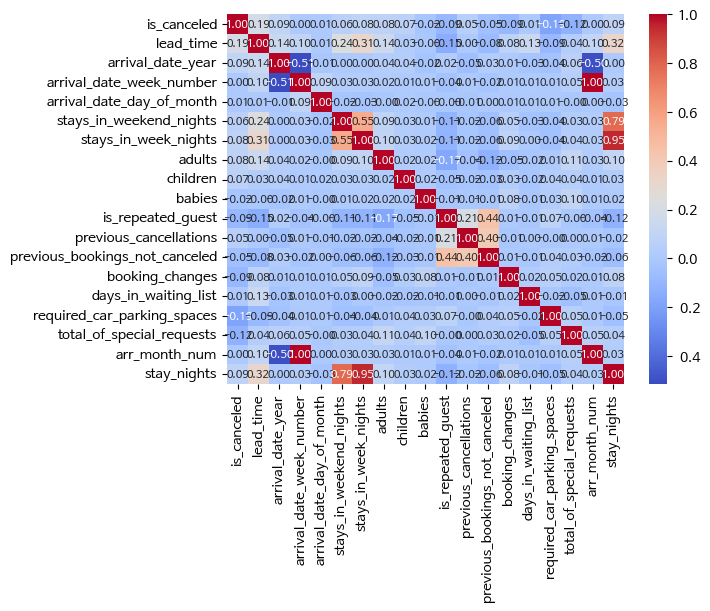

In [ ]:
# sns.heatmap(df_new.select_dtypes(include="number").corr(), cmap='coolwarm', annot=True)
# plt.figure(figsize=(12, 10))  # 그림 크기 확대
# sns.heatmap(df_new.select_dtypes(include="number").corr(),
sns.heatmap(df_new_cleaned.select_dtypes(include="number").corr(),
            cmap='coolwarm',
            annot=True,
            annot_kws={"size": 8},  # 폰트 크기 조정
            fmt='.2f')  # 소수점 둘째 자리까지
plt.show()


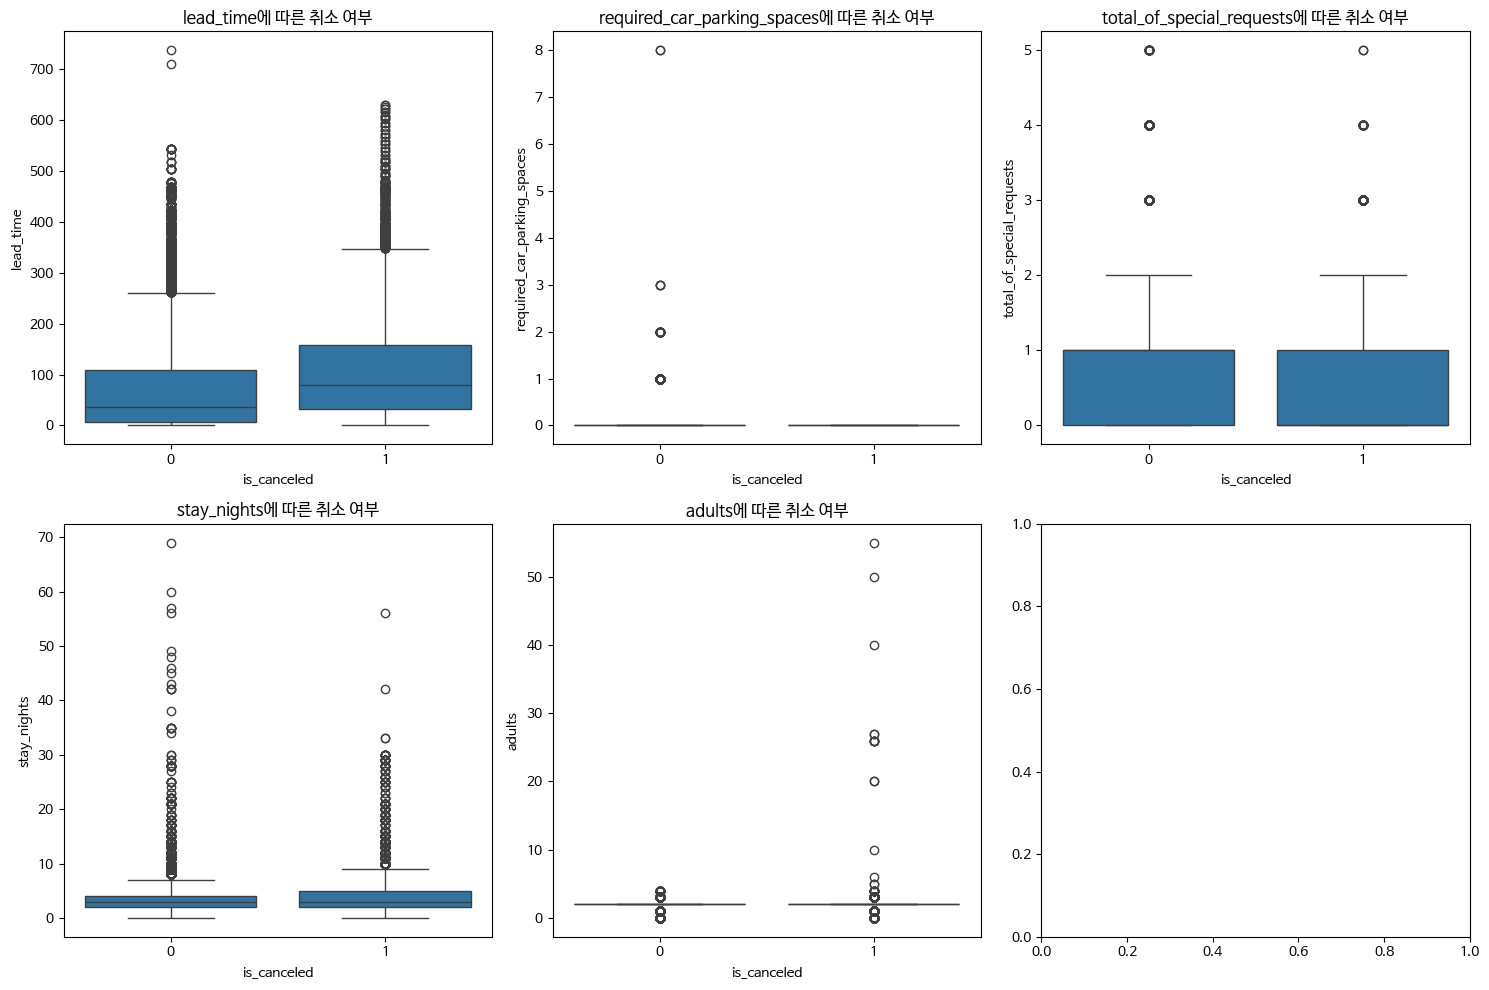

In [ ]:
# 취소 여부에 따른 수치형 변수들 비교
numeric_cols = ['lead_time',#'days_in_waiting_list','booking_changes',
                # 'arr_month_num','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                'required_car_parking_spaces', 'total_of_special_requests',
                'stay_nights',#'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults',# 'children','babies'
                ]

# fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_new_cleaned, x='is_canceled', y=col, ax=axes[i])
    axes[i].set_title(f'{col}에 따른 취소 여부')

plt.tight_layout()
plt.show()


In [ ]:
# 주차공간, 취소여부
# df_new_cleaned.loc[df_new_cleaned['is_canceled']==1,'required_car_parking_spaces'].value_counts()
park_c = pd.crosstab(df_new_cleaned['required_car_parking_spaces'],
                      df_new_cleaned['is_canceled'])
park_c

is_canceled,0,1
required_car_parking_spaces,,
0,55129,23888
1,7236,0
2,28,0
3,3,0
8,2,0


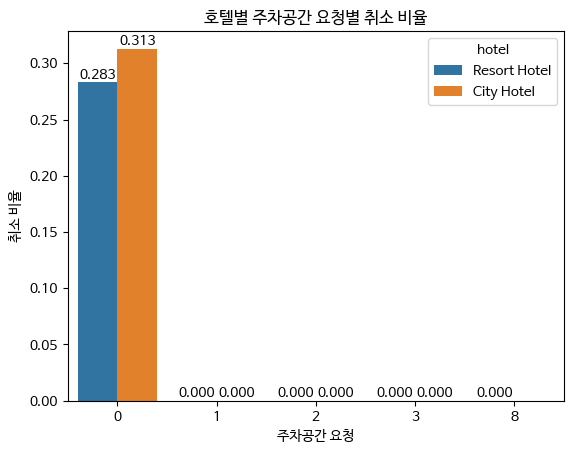

In [ ]:
# 주차공간 요청별 취소율, 씨티/리조트
ax = sns.barplot(data=df_new_cleaned, x='required_car_parking_spaces',
            y='is_canceled',
            hue='hotel',
            ci=None)
plt.title('호텔별 주차공간 요청별 취소 비율')
plt.xlabel('주차공간 요청')
plt.ylabel('취소 비율')

# 그래프 위에 값 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.show()

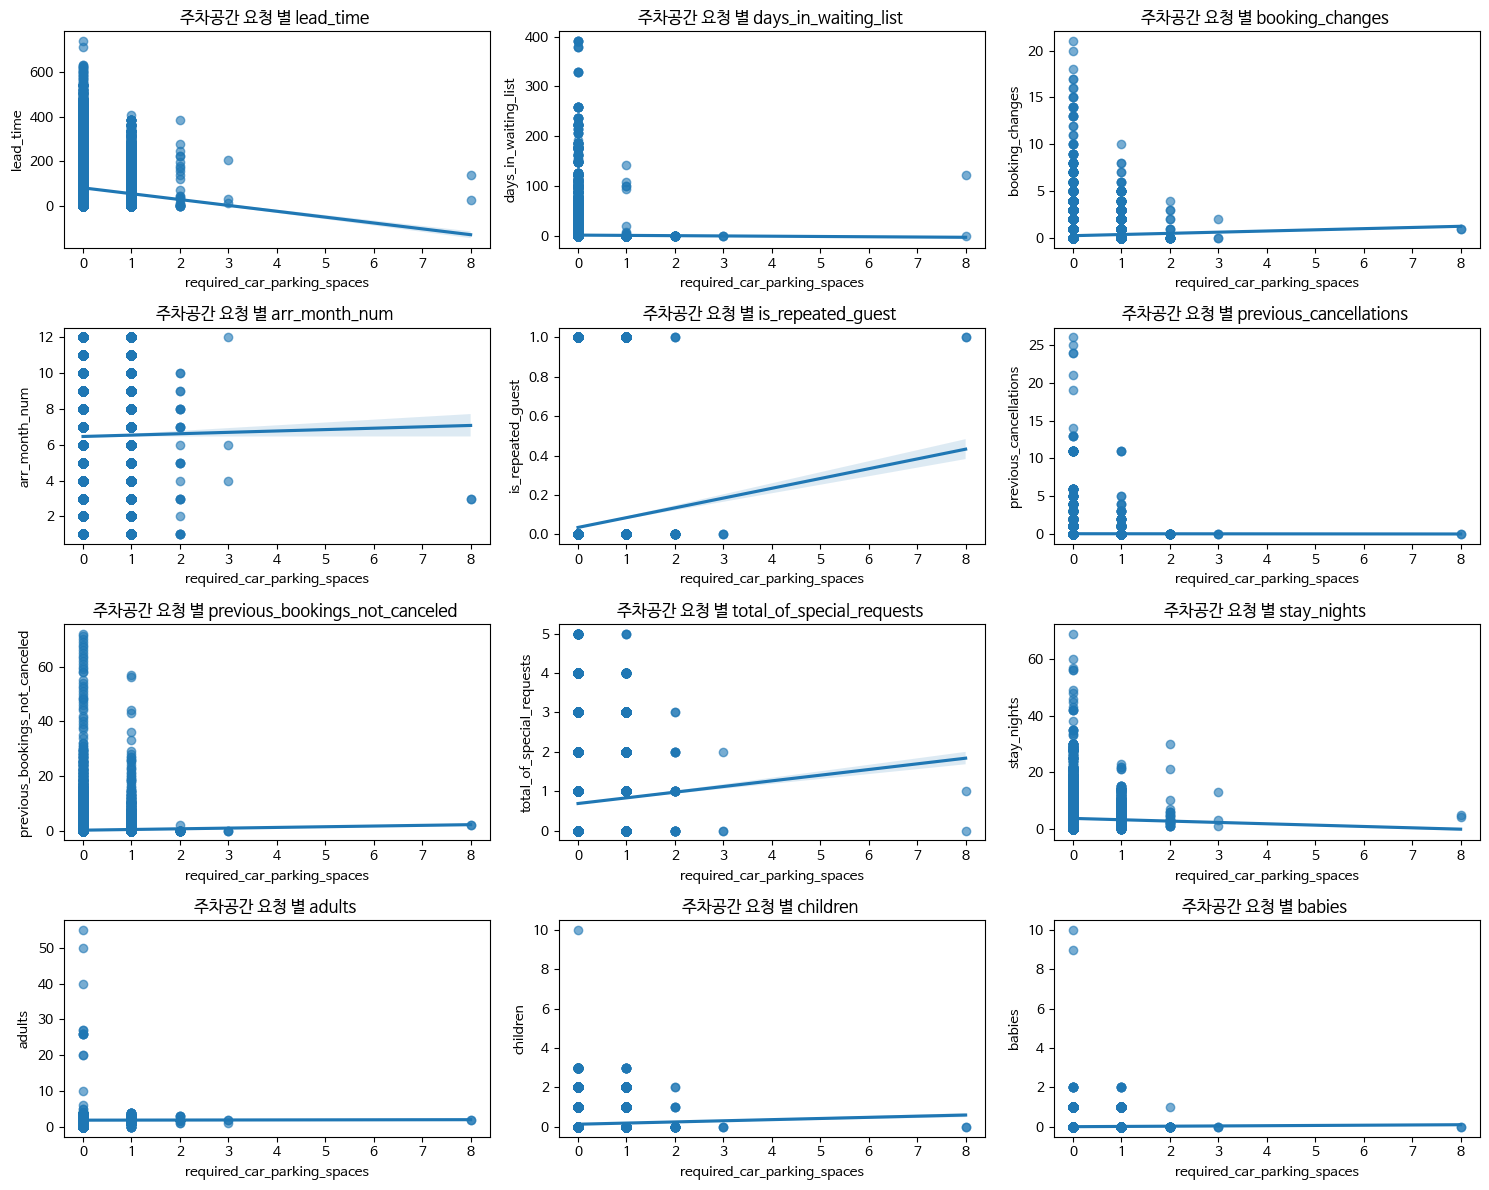

In [ ]:
# 주차공간 관련 비교-주차공간은 기본으로두고 다른변수도 있는지
numeric_cols = ['lead_time','days_in_waiting_list','booking_changes',
                 'arr_month_num','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                # 'required_car_parking_spaces',
                'total_of_special_requests',
                'stay_nights',#'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children','babies'
                ]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    # 산점도 + 회귀선
    sns.regplot(data=df_new_cleaned, x='required_car_parking_spaces', y=col,
                fit_reg=True,      # 추세선 표시
                scatter_kws={'alpha': 0.6},
                ax=axes[i])
    axes[i].set_title(f'주차공간 요청 별 {col} ')

plt.tight_layout()
plt.show()

특별 요청total_of_special_requests, 재방문 고객 is_repeated_guest 주차공간에 따라 약간 증가했다.

## 결론 - 호텔/리조트에 주차장 필수
### required_car_parking_spaces가 영향있는 컬럼!! 취소한 투숙객은 required_car_parking_spaces가 전부 0이다.
### 뚜벅이들이 취소함
## 해결 방안 - 셔틀버스 운행!
### 차량이 없는 경우 예약취소가 발생하기에
셔틀버스를 운행하여 차량이 없는 투숙객의 접근성을 높여 취소율을 낮춘다.

주차대수와 다른 변수와의 연관성을 파악하긴 어려웠다.


In [ ]:
# is_canceled와 다른 수치형 변수들 간의 상관관계
correlation_with_is_canceled = df_new_cleaned.select_dtypes(include="number").corr()['is_canceled'].sort_values(ascending=False)
display(correlation_with_is_canceled)

,is_canceled
is_canceled,1.000000
lead_time,0.191613
arrival_date_year,0.089137
stay_nights,0.085990
stays_in_week_nights,0.084934
adults,0.081171
children,0.066628
stays_in_weekend_nights,0.061204
previous_cancellations,0.050549
days_in_waiting_list,0.005792


lead_time이 취소와 양의 상관관계를 가진다.

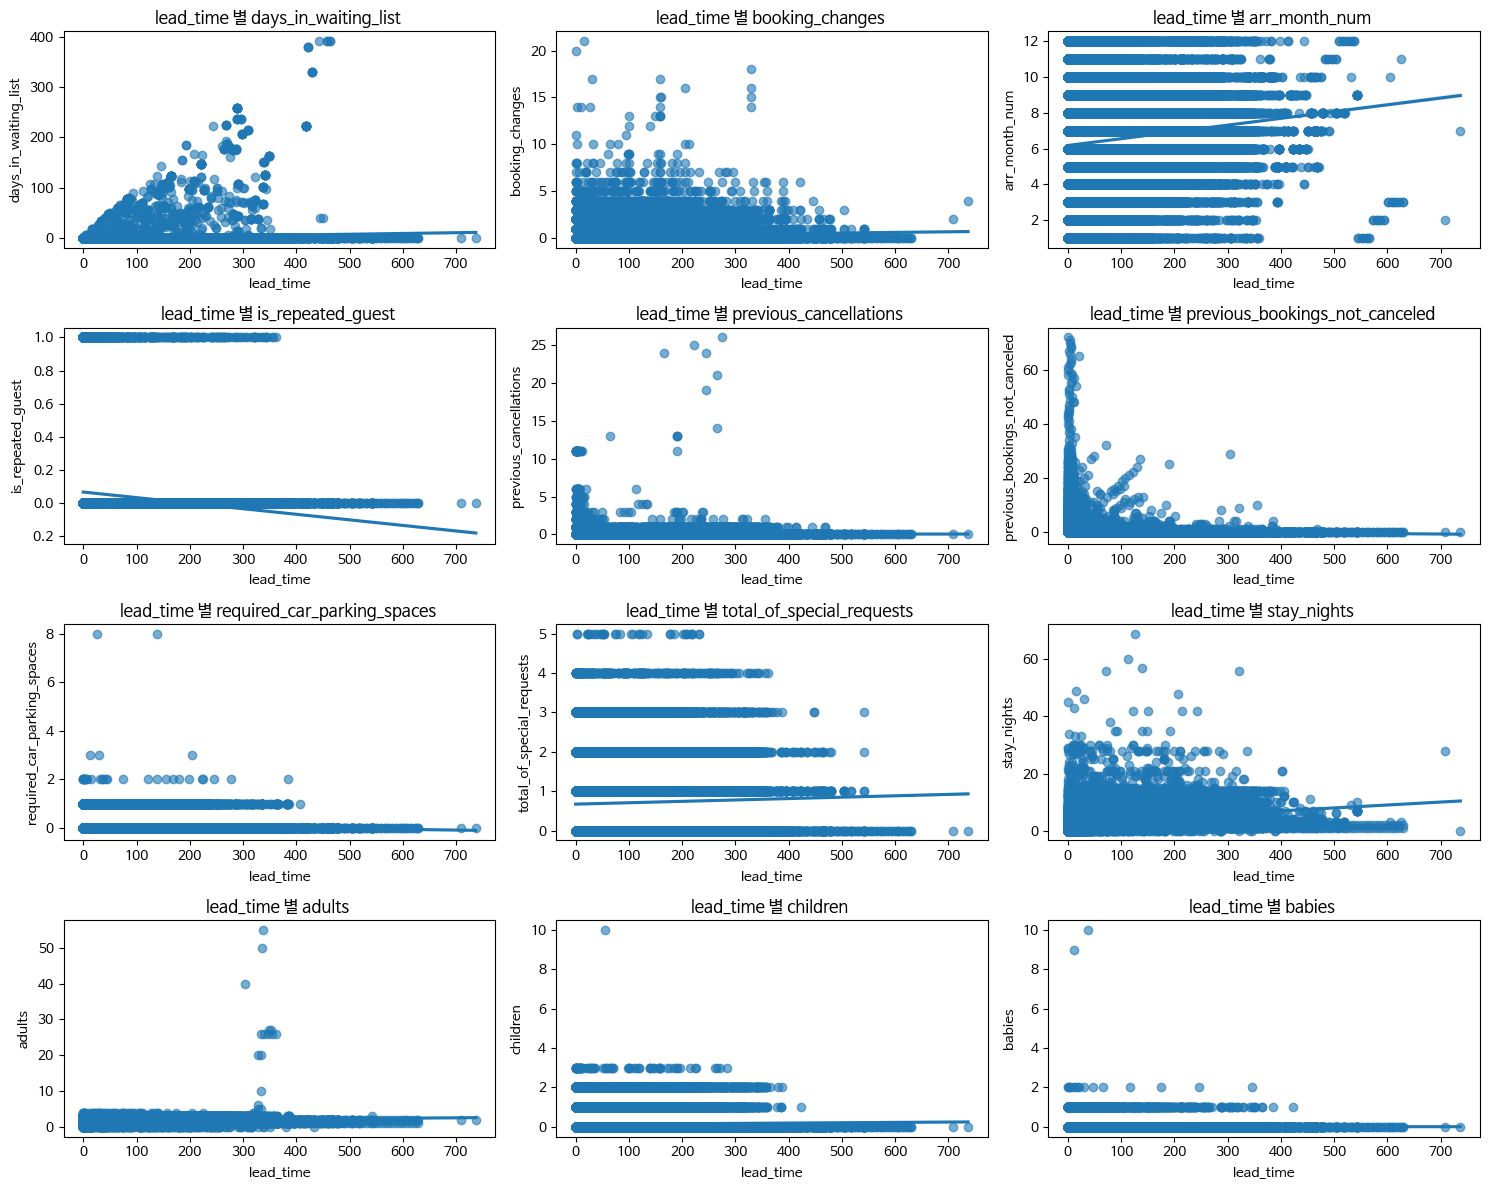

In [ ]:
numeric_cols = [# 'lead_time',
                'days_in_waiting_list','booking_changes',
                 'arr_month_num','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                'required_car_parking_spaces',
                'total_of_special_requests',
                'stay_nights',#'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children','babies'
                ]

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    # 산점도 + 회귀선
    sns.regplot(data=df_new_cleaned, x='lead_time', y=col,
                fit_reg=True,      # 추세선 표시
                scatter_kws={'alpha': 0.6},
                ax=axes[i])
    axes[i].set_title(f'lead_time 별 {col} ')

plt.tight_layout()
plt.show()

In [ ]:
park_l = pd.crosstab(df_new_cleaned['lead_time'],
                      df_new_cleaned['is_canceled'])
park_l

is_canceled,0,1
lead_time,,
0,5577,352
1,2982,213
2,1741,180
3,1529,167
4,1405,153
...,...,...
622,0,2
626,0,1
629,0,2


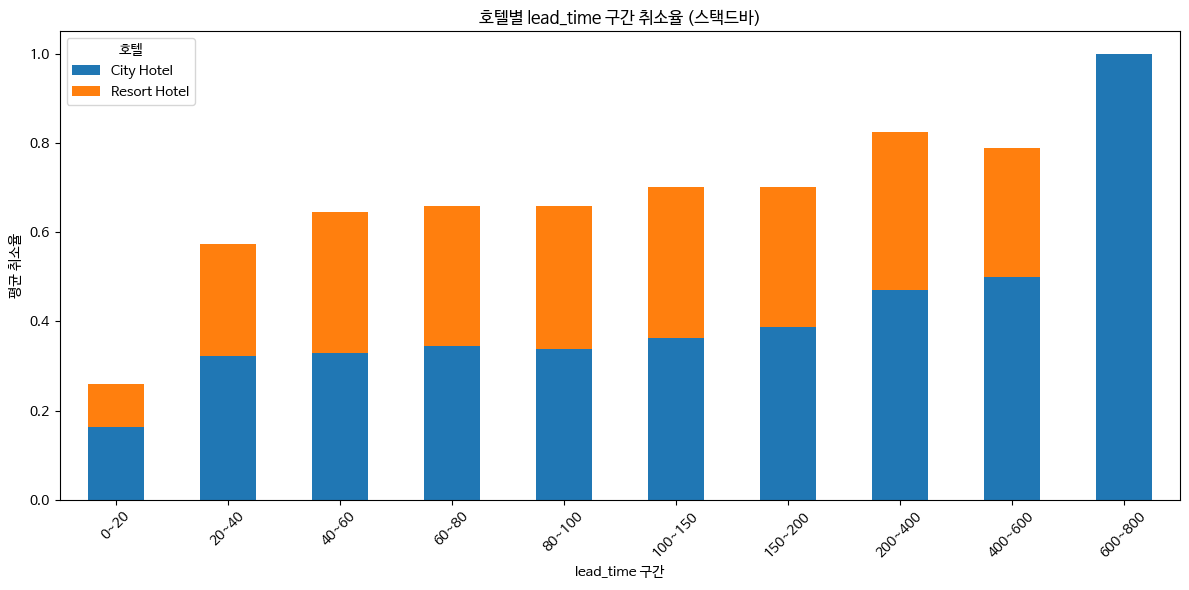

In [ ]:
# # lead_time을 10일 단위로 구간화
# df_new_cleaned['lead_time_group'] = pd.cut(df_new_cleaned['lead_time'], bins=range(0, df_new_cleaned['lead_time'].max()+10, 10))

# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df_new_cleaned, x='lead_time_group', y='is_canceled', hue='hotel')
# plt.title('호텔별 lead_time 구간과 취소 비율(Boxplot)')
# plt.xlabel('lead time 구간')
# plt.ylabel('취소 비율')
# plt.xticks(rotation=45)
# plt.show()
# import pandas as pd
# import matplotlib.pyplot as plt

# lead_time 구간(예: 20일 단위로 그룹화)
bins = [0, 20, 40, 60, 80, 100, 150, 200, 400,600,800]
labels = [f"{bins[i]}~{bins[i+1]}" for i in range(len(bins)-1)]
df_new_cleaned['lead_time_group'] = pd.cut(df_new_cleaned['lead_time'], bins=bins, labels=labels, right=False)

# 그룹별 취소율 집계
cancel_group = df_new_cleaned.groupby(['lead_time_group', 'hotel'])['is_canceled'].mean().unstack()
cancel_group = cancel_group.fillna(0)

# 스택드 바그래프
cancel_group.plot(kind='bar', stacked=True, figsize=(12,6), color=['#2077b4', '#ff7f0e'])
plt.title("호텔별 lead_time 구간 취소율 (스택드바)")
plt.xlabel("lead_time 구간")
plt.ylabel("평균 취소율")
plt.xticks(rotation=45)
plt.legend(title='호텔')
plt.tight_layout()
plt.show()


lead_time이 길수록 취소율이 증가한다.
미리 예약하면 할인같은 혜택을 줘서 취소 하지 않게한다.